# L-fold Cross Validation (Question 2) 


 - Student Name: Akshay Sapra 
 - Stuident ID: 29858186
 
Programming Language used: R in Jupyter Notebook

Libraries Used: 
- ggplot2 - for data visualisation
- reshape2- to reshape the data

### Steps for the solution
<ol>
	<li>Load the Train and test dataset provided as part of the assignment specification</li>
    <li>Reuse and modify the KNN method used in the previous question,</li>
    <li>Define the CV function that takes the training data and their labels, the size of the neighborhood ($K$) and num of fold,
	<li>Apply L-Fold CV where for some values of $K$ and report average training and testing error</li>
	<li>Plot Average error versus $1/K$ where $K \in \{1,\cdots,15\}$</li>
</ol>

### Libraries Used

In [1]:
library (reshape2) # to reshape the data
library (ggplot2) # for data visualisation

### Load and Explore Data

In [2]:
# REading the data from csv 
Train= read.csv('Task1A_train.csv')
Test= read.csv('Task1A_test.csv')

In [3]:
# Checking first few rows 
head(Train)

x1,y
1960.0,0.71
1960.5,0.85
1961.0,0.61
1961.5,0.92
1962.0,0.72
1962.5,0.92


In [4]:
# Checking first few rows 
head (Test)

x1,y
1960.25,0.63
1960.75,0.44
1961.25,0.69
1961.75,0.55
1962.25,0.77
1962.75,0.60


In [5]:
# Checking the dimensions of Train and Test data
dim (Train)
dim (Test)

[1] 42  2

[1] 42  2

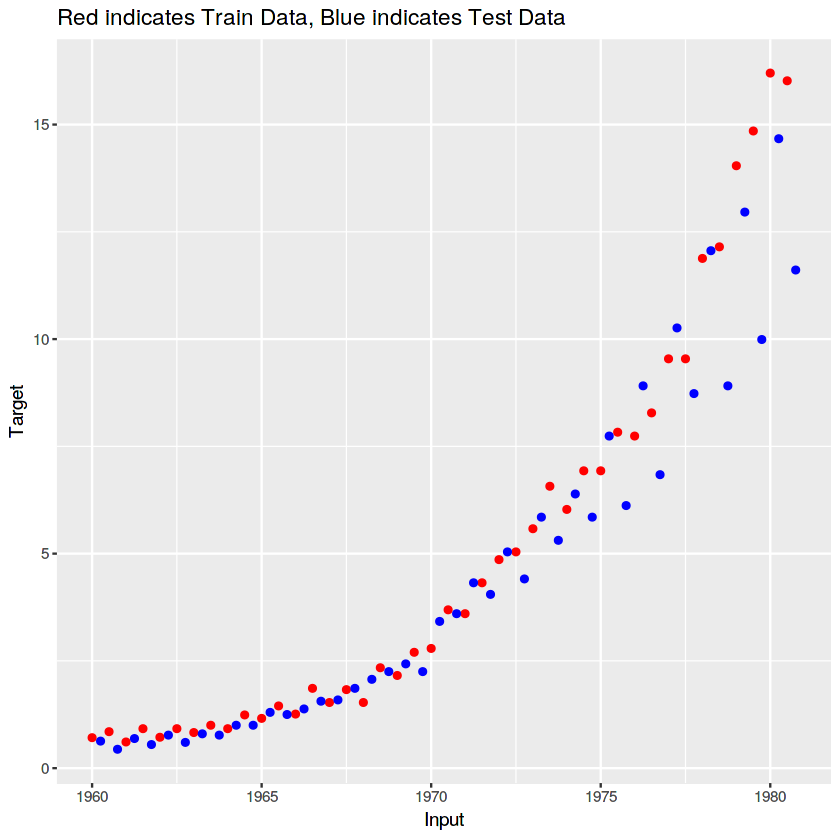

In [6]:
ggplot(data= Train,aes (x=x1,y=y) )+geom_point(color='Red') + scale_colour_manual(name ="Data", labels=c("Train", "Test"),values=c("Red","Blue"))  +labs (x= "Input", y ="Target") +ggtitle ("Red indicates Train Data, Blue indicates Test Data")+geom_point(data= Test,aes (x=x1,y=y),color='Blue')


In [7]:
#divinding train and test data into separate data and label columns 
train.data <- Train
train.label<-Train[,'y']
test.data<- Test
test.label<-Test[,'y']

#### Task I
Implement a L-Fold Cross Validation (CV) function for your KNN
regressor:
           
           cv(train.data, train.label, K, numFold=10)
 which takes the training data and their labels (continuous values), the
 number of folds, and returns errors for different folds of the training data

### KNN Regressor

In [8]:
# KNN function (distance should be one of euclidean, maximum, manhattan, canberra, binary or minkowski)
knn <- function(train_data, train_label, test_data, K=4, distance = 'euclidean'){
    ## count number of train samples
    train.len <- nrow(train_data)
    
    ## count number of test samples
    test.len <- nrow(test_data)
    ## calculate distances between samples
    dist <- as.matrix(dist(rbind(test_data, train_data), method= 'euclidean'))[1:test.len, (test.len+1):(test.len+train.len)]
    
    ## for each test sample...
    pred <-list()
    for (i in 1:test.len){
        ### ...find its K nearest neighbours from training sampels...
        nn <- as.data.frame(sort(dist[i,], index.return = TRUE))[1:K,2]
        
        ###... and calculate the predicted labels according to the majority vote
        pred[i]<- (mean(train_label[nn]))
    }
    
    ## return the class labels as output
    return (as.numeric(pred))
}

### CV Function

In [9]:
cv <- function(train.data, train.label, numFold=10,K=4){
    #creating 10 folds for entire data (Prints: 1,2,3...9,10,1,2,3,...,9,10,1,2)
    folds <- rep_len(1:numFold,nrow(train.data))
    
    # Creating data frame to store fold number and error
    Error <- data.frame('fold'= 1:numFold, 'error'=rep(0,numFold))
    
    # Creating training and test data according to each fold
    for (i in 1:numFold){
        #Segement your data by fold using the which() function 
        testIndexes <- which(folds==i)
        # Reference https://stats.stackexchange.com/questions/61090/how-to-split-a-data-set-to-do-10-fold-cross-validation
        testData <- train.data[testIndexes, ]
        trainData <- train.data[-testIndexes, ]
        trainLabel <- trainData[,2]
        testLabel <- testData[,2]
    
        # Storing average error according to each fold
        Error[i,'error'] <- sqrt(mean((knn(trainData, trainLabel, testData, K) - testLabel)^2))
        }
    return (Error)
}

#### Task II
Using the training data in Question 1, run your L-Fold CV where the numFold is set to 10. Change the value of K=1,..,15 in your KNN regressor,
and for each K compute the average 10 error numbers you have got. Plot
the average error numbers versus 1/K for K=1,..,15 in your KNN regressor.
Save the plot in your Jupyter Notebook file for Question 2.

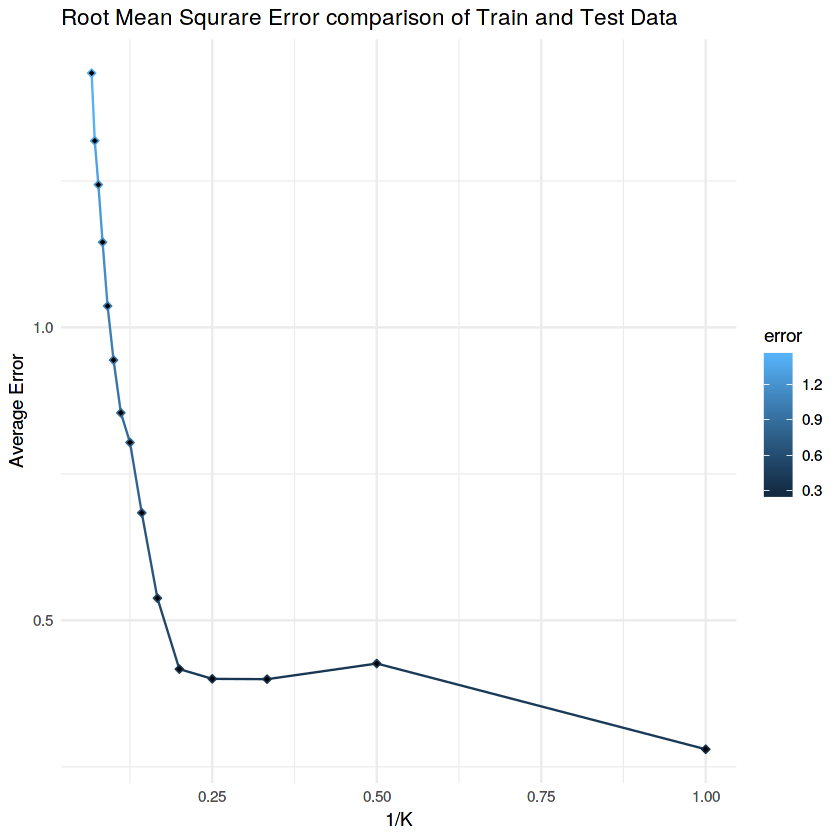

In [33]:
#Creating Data Frame to store average error
errorForK <- data.frame ('K'= rep(1:15), 'error'=rep(1,15))
#Calculating Average error for each K
for (k in 1:15){
    errorForK[k,'error'] <- mean (cv(train.data, train.label, numFold=10,K=k)[,2])
}

#Plotting the graph
ggplot(data=errorForK, aes(x=1/K,y=error, col=error))+geom_line() + geom_point(shape=23, fill='black')+  theme_minimal() +  ggtitle("Average Error Vs 1/K")+labs ( y ="Average Error") 


#### Task III

Report (in your Jupyter Notebook file) the optimum value for K based on
your plot for this 10-fold cross validation in the previous part (Part II)

- It can be easily concluded from the above graph that minimum value of K for which error is minimum is 4 
- This value is different from the one we observed from the preovious question which was optimal for K = 5